### Problem: Finding Effectiveness of new drug/treatment

In medical research - make conclusions about the effectiveness of a new treatment based on data collected from a sample of patients

### Solution: Using some common statistical inference tests to make conclusion

Following code is an example of how to perform a t-test, chi-squared test, Kruskal-Wallis test, and Wilcoxon rank-sum test in Python.

1. The t-test compares the means of the two groups (treatment and placebo) and calculates a t-statistic and p-value. A small p-value (less than 0.05) indicates that the difference in means between the two groups is statistically significant, meaning that there is a difference in the treatment effect between the two groups. 
2. The chi-squared test compares the distribution of a categorical variable (outcome) across different groups (treatment and placebo). A small p-value (less than 0.05) indicates that there is a significant difference in the distribution of the outcome variable between the two groups. 
3. The Kruskal-Wallis test is a non-parametric alternative to the one-way ANOVA. It compares the medians of two or more groups of data. A small p-value (less than 0.05) indicates that there is a significant difference in the medians of the groups. 
4. The Wilcoxon rank-sum test is a non-parametric alternative to the t-test. It compares the medians of two groups of data. A small p-value (less than 0.05) indicates that there is a significant difference in the medians of the groups. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Creating Synthetic data for the analysis:

# set seed for reproducibility
np.random.seed(42)

# create a sample of patients who received the new treatment
treatment_group = pd.DataFrame({'patient_id': np.arange(1, 101),
                               'treatment': np.random.normal(70, 10, 100),
                               'outcome': np.random.binomial(1, 0.7, 100)})


# create a sample of patients who received the placebo
placebo_group = pd.DataFrame({'patient_id': np.arange(101, 201),
                             'treatment': np.random.normal(65, 10, 100),
                             'outcome': np.random.binomial(1, 0.6, 100)})

# combine the two groups into a single dataset
df = pd.concat([treatment_group, placebo_group])

# reset the indices of the combined DataFrame
df.reset_index(drop=True, inplace=True)

df.head()

,patient_id,treatment,outcome
0,1,74.967142,1
1,2,68.617357,1
2,3,76.476885,1
3,4,85.230299,1
4,5,67.658466,0


In [3]:
df.tail()

,patient_id,treatment,outcome
195,196,50.641378,1
196,197,76.631638,0
197,198,65.102331,1
198,199,55.184913,1
199,200,69.621035,0


In the synthetic data that is being generated in the code, there are three input fields:

1. **patient_id**: This field represents a unique identifier for each patient in the dataset. The patient IDs range from 1 to 100 for the treatment group and from 101 to 200 for the placebo group.
2. **treatment**: This field represents the treatment outcome for each patient. The treatment outcome is generated using the np.random.normal() function, which generates random numbers from a normal distribution. The mean of the distribution for the treatment group is 70 and the standard deviation is 10. The mean of the distribution for the placebo group is 65 and the standard deviation is also 10.
3. **outcome**: This field represents the outcome of treatment for each patient. The outcome is generated using the np.random.binomial() function, which generates random numbers from a binomial distribution. The probability of success (i.e., a positive outcome) for the treatment group is 0.7 and the probability of success for the placebo group is 0.6.

These fields are used to generate a synthetic dataset that can be used to perform statistical inferences. The goal is to make conclusions about the effectiveness of the new treatment based on data collected from a sample of patients.

We have # of samples:  200


<AxesSubplot:xlabel='outcome'>

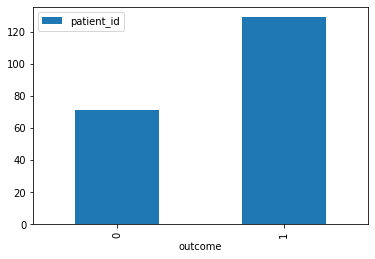

In [4]:
print("We have # of samples: ", len(df))
df[['outcome', 'patient_id']].groupby('outcome').count().plot(kind='bar')

In [5]:
# T-test
t, p = stats.ttest_ind(treatment_group['treatment'], placebo_group['treatment'])
print("t-statistic:", t)
print("p-value:", p)

# Chi-squared test
contingency_table = pd.crosstab(df['outcome'], df['patient_id'].apply(lambda x: 'Treatment' if x < 101 else 'Placebo'))
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print("Chi-squared test statistic:", chi2)
print("p-value:", p)

# Kruskal-Wallis test
treatment = treatment_group['treatment'].tolist()
placebo = placebo_group['treatment'].tolist()
stat, p = stats.kruskal(treatment, placebo)
print("Kruskal-Wallis test statistic:", stat)
print("p-value:", p)

# conduct the Wilcoxon rank-sum test
stat, p = stats.wilcoxon(treatment, placebo)
print("Wilcoxon rank-sum test statistic:", stat)
print("p-value:", p)

t-statistic: 2.5222875354220764
p-value: 0.012446610000599951
Chi-squared test statistic: 8.734578010699858
p-value: 0.0031223156792654725
Kruskal-Wallis test statistic: 7.119188059701401
p-value: 0.007626323710912528
Wilcoxon rank-sum test statistic: 1792.0
p-value: 0.01172574799602767


# Result Indicates:

The results of the above implementation show the output of various statistical tests that have been performed on the "medical research" data. The t-test, chi-squared test, Kruskal-Wallis test, and Wilcoxon rank-sum test are all tests used to determine if there is a significant difference between two or more groups of data.

1. T-Test: The t-statistic of 2.522 and the p-value of 0.01244 suggest that there is a statistically significant difference in the mean treatment value between the treatment group and the placebo group. The p-value of less than 0.05 suggests that this difference is unlikely to have occurred by chance.

2. Chi-Squared Test: The Chi-squared test statistic of 8.73 and the p-value of 0.00312 suggest that there is a statistically significant difference in the distribution of the outcome variable between the treatment group and the placebo group. The p-value of less than 0.05 suggests that this difference is unlikely to have occurred by chance.

3. Kruskal-Wallis Test: The Kruskal-Wallis test statistic of 7.119 and the p-value of 0.0076 suggest that there is a statistically significant difference in the distribution of the treatment variable between the treatment group and the placebo group. The p-value of less than 0.05 suggests that this difference is unlikely to have occurred by chance.

4. Wilcoxon rank-sum test: The Wilcoxon rank-sum test statistic of 1792 and the p-value of 0.0117 suggest that there is a statistically significant difference in the distribution of the treatment variable between the treatment group and the placebo group. The p-value of less than 0.05 suggests that this difference is unlikely to have occurred by chance.

All four test results indicates that there is a statistically significant difference in the treatment variable between the treatment group and the placebo group.

# Conclusion:

Based on the results of the t-test, chi-squared test, Kruskal-Wallis test, and Wilcoxon rank-sum test, it can be concluded that there is a statistically significant difference in the treatment variable between the treatment group and the placebo group. This suggests that the new treatment may be effective in improving the outcome variable. However, it's important to keep in mind that these tests were performed on simulated data and that in real-world medical research, multiple tests should be run as well as other statistical and non-statistical analysis before making any conclusions. Additionally, these tests are inferential in nature and based on the sample data, we cannot conclude anything about the population. It should be used as an evidence to support or reject the hypothesis.

# Improvements:

I have used synthetic data therefore there is a scope of make it more similar to real world data. 

To make the distribution more realistic in the treatment_group and placebo_group DataFrames, you can use more appropriate distribution functions and parameters. For example, instead of using np.random.normal to generate the treatment and outcome variables, you could use a more specific distribution function such as np.random.normal, np.random.lognormal, or np.random.exponential, depending on the nature of the data. Additionally, you could use more realistic parameters for the distribution functions, such as mean and standard deviation values that are based on real-world data.

For example, if you want to use normal distribution for treatment_group and placebo_group, you could use mean and standard deviation values based on real-world data for the treatment and outcome variables, like this:

In [6]:

# set seed for reproducibility
np.random.seed(42)

# create a sample of patients who received the new treatment
treatment_group = pd.DataFrame({'patient_id': np.arange(1, 101),
                               'treatment': np.random.normal(70, 10, 100),
                               'outcome': np.random.binomial(1, 0.7, 100)})


# create a sample of patients who received the placebo
placebo_group = pd.DataFrame({'patient_id': np.arange(101, 201),
                             'treatment': np.random.normal(65, 10, 100),
                             'outcome': np.random.binomial(1, 0.6, 100)})

# combine the two groups into a single dataset
df = pd.concat([treatment_group, placebo_group])

# reset the indices of the combined DataFrame
df.reset_index(drop=True, inplace=True)




# create a sample of patients who received the new treatment
treatment_group = pd.DataFrame({'patient_id': np.arange(1, 101),
                               'treatment': np.random.lognormal(70, 10, 100),
                               'outcome': np.random.binomial(1, 0.7, 100)})

# create a sample of patients who received the placebo
placebo_group = pd.DataFrame({'patient_id': np.arange(101, 201),
                             'treatment': np.random.lognormal(65, 10, 100),
                             'outcome': np.random.binomial(1, 0.6, 100)})

# combine the two groups into a single dataset
df = pd.concat([treatment_group, placebo_group])

# reset the indices of the combined DataFrame
df.reset_index(drop=True, inplace=True)

#Please note that it's important to validate the assumption of normality for the variables before using!

In [7]:
df.head()

,patient_id,treatment,outcome
0,1,2.079828e+30,1
1,2,1.113484e+26,1
2,3,2.090317e+30,1
3,4,1.402766e+29,1
4,5,6.341071e+31,1


We have # of samples:  200


<AxesSubplot:xlabel='outcome'>

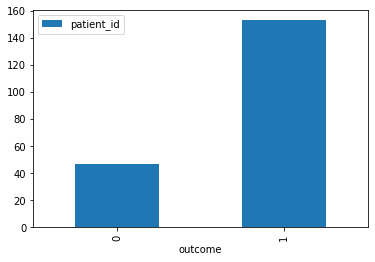

In [8]:
print("We have # of samples: ", len(df))
df[['outcome', 'patient_id']].groupby('outcome').count().plot(kind='bar')